In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [9]:
df = pd.read_csv("ASIANPAINT.csv")
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

for col in ['Close', 'Open', 'High', 'Low']:
    df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)

df_ts = df[['Date', 'Close']].copy()
df_ts = df_ts.rename(columns={'Close': 'Close'})
df_ts.set_index('Date', inplace=True)


In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


<Axes: title={'center': 'Stock Closing Price Over Time'}, xlabel='Date'>

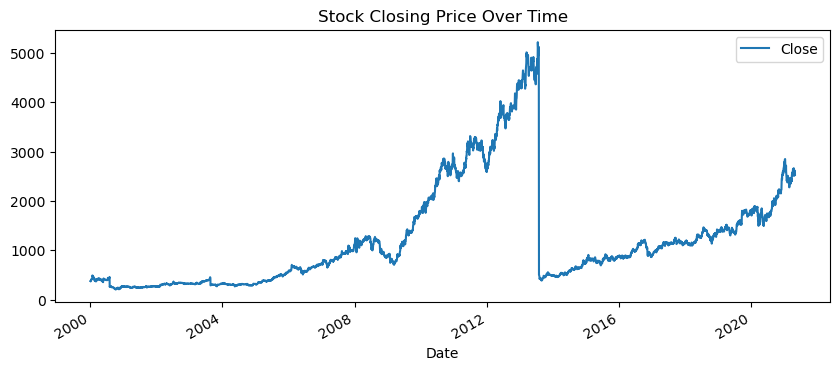

In [11]:
df_ts.plot(title="Stock Closing Price Over Time", figsize=(10, 4))

C:\Users\Nischay kapoor\AppData\Local\Temp\ipykernel_13124\3219834903.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


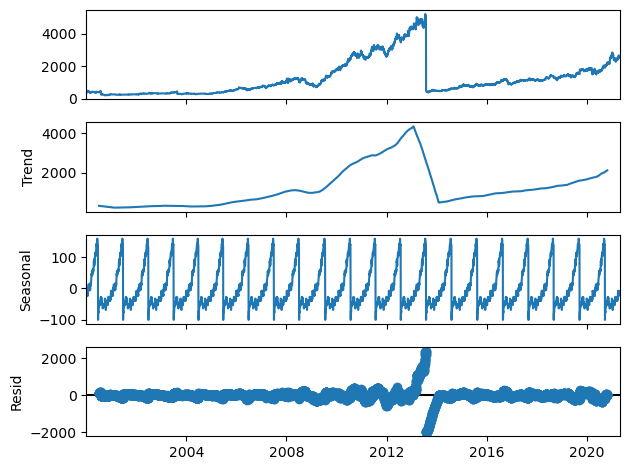

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_ts, model='additive', period=252)  # ~1 trading year
decomposition.plot()
plt.tight_layout()
plt.show()

ARIMA Model

C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

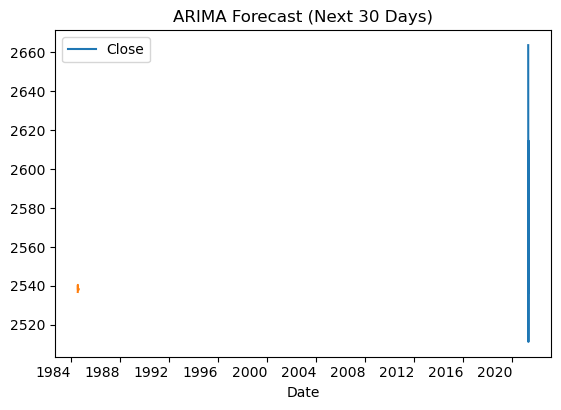

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
model_arima = ARIMA(df_ts, order=(5, 1, 0))  # You can tune (p,d,q)
arima_result = model_arima.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=30)
df_ts[-10:].plot()
forecast_arima.plot(title='ARIMA Forecast (Next 30 Days)')
plt.show()

SARIMA

C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

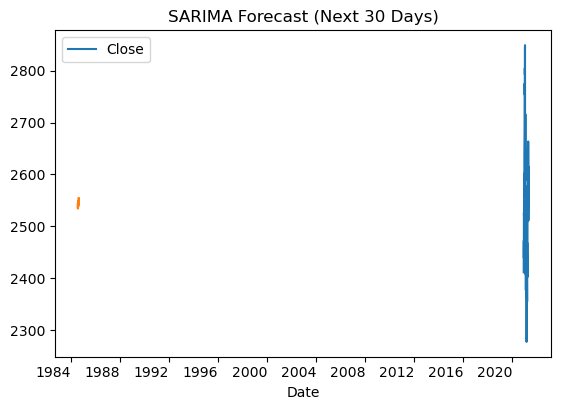

In [14]:
model_sarima = SARIMAX(df_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result_sarima = model_sarima.fit()

forecast_sarima = result_sarima.forecast(steps=30)
df_ts[-100:].plot()
forecast_sarima.plot(title='SARIMA Forecast (Next 30 Days)')
plt.show()

FB Prophet

20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing


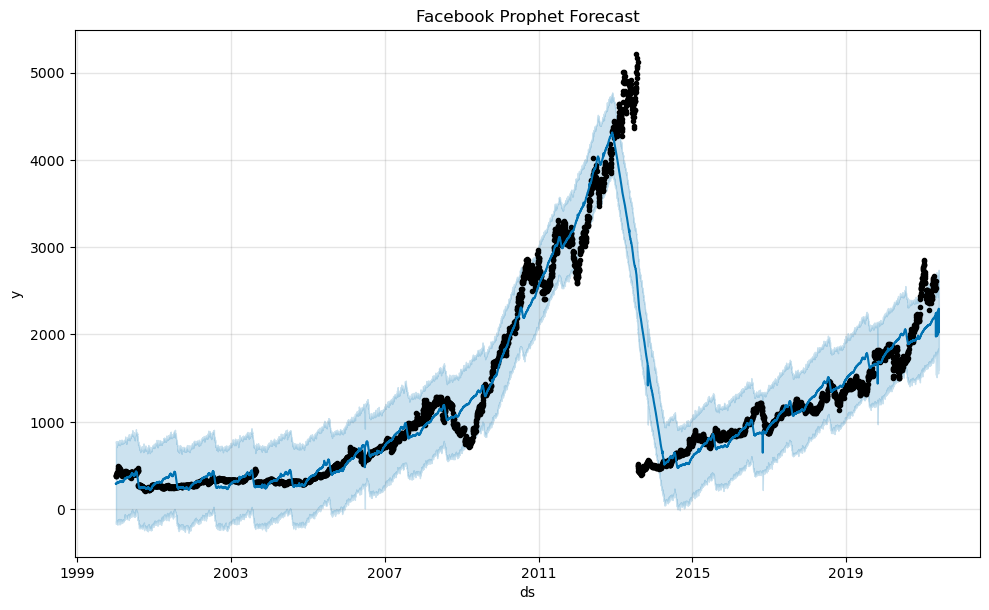

In [15]:
df_prophet = df_ts.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

m.plot(forecast)
plt.title("Facebook Prophet Forecast")
plt.show()

LSTM

C:\Users\Nischay kapoor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.0145
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - loss: 0.0014
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 7.9118e-04
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - loss: 0.0010
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 4.6374e-04
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


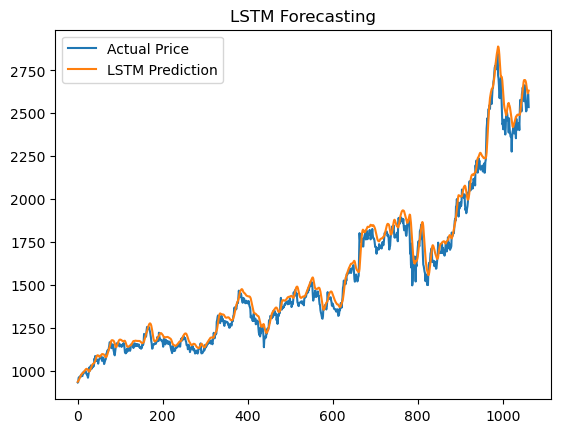

In [16]:
# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_ts)

# Train/Test Split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # Use 60 days history

# Create sequences
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

real = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.plot(real, label='Actual Price')
plt.plot(predictions, label='LSTM Prediction')
plt.legend()
plt.title("LSTM Forecasting")
plt.show()